In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from datetime import datetime

In [4]:
today = datetime(2019,1,24)

In [5]:
today #연, 월, 일, 시 , 분 (default = 0)

datetime.datetime(2019, 1, 24, 0, 0)

In [7]:
print(today.year, today.month, today.day)

2019 1 24


In [8]:
dates = [datetime(2019,1,23), datetime(2019,1,24)]

# 시간데이터를 Index로 넘겨주려면

In [9]:
dt_index = pd.DatetimeIndex(dates) #이렇게 넘겨주면 된다.
dt_index #string인것 같지만 dtype이 datetime으로 되어있다는 것을 볼 수 있다.

DatetimeIndex(['2019-01-23', '2019-01-24'], dtype='datetime64[ns]', freq=None)

## 그럼 dataframe을 만들어보자.

In [12]:
data = np.random.randn(2,2)
cols = ['A','B']

In [16]:
df = pd.DataFrame(data = data, index = dt_index, columns = cols)

In [20]:
df.index

DatetimeIndex(['2019-01-23', '2019-01-24'], dtype='datetime64[ns]', freq=None)

In [22]:
print(df.index.max(), df.index.min(), df.index.argmax()) 
# max값의 인덱스를 가져옴 series의 index라서 0,1, ... 값으로 가져옴

2019-01-24 00:00:00 2019-01-23 00:00:00 1


In [23]:
df = pd.read_csv('./data/apple_stock.csv')

In [25]:
#index가 datetime이 아님에 유의.
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [26]:
#Date가 object다. 이것을 datetime으로 바꾸고 index로 지정해주자.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


In [28]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [32]:
#이렇게만 하면 Date가 index간 dataframe이 return되고 기존 df에는 Date가 그대로 col에 남아있다.
df.set_index('Date')

#그래서 반환을 받던, inplace = True를 설정해준다.
df.set_index('Date', inplace = True)

In [33]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


## 이제 여기서 monthly data만을 얻고싶다면..

In [35]:
df['month'] = df.index.month

In [36]:
df

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,1
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,1
...,...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,12
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,12
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,12


In [37]:
#월별로 groupby진행 후 sum하면 월별 데이터들이 나온다.
df.groupby('month').agg(sum)

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


## 연도가 달라졌는데 연도 정보가 사라져버렸다.

In [38]:
#이러면 연도별로 볼 수 있는데 year- month를 같이 하고싶다면,,,
df.groupby(df.index.year).sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [39]:
#멀티 인덱스를 준다음에 agg(sum)해보자.
df.groupby([df.index.year, df.index.month]).agg(sum)

High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
...                ...          ...          ...          ...           ...   
2018 8     4934.909988  4860.029999  4883.340012  4906.960037  7.002737e+08   
     9     4266.080002  4181.480011  4224.290009  4219.400024  6.789720e+08   
     10    5150.640030  5011.109985  5087.600021  5079.449997  7.897485e+08   
     11    4072.939987  3962.709976  4028.209991  4015.949997  9.613264e+08   
     12    3179.080017  3075.930023  3139.619995  3121.060028  8.989225e+08   

             Adj Close  month  
Date Date                      
2009 12      20.159719     12  
2010 1      377.554930     19  
     2      361.342400     38  
     3      491.575537     69  
     4      504.554579     84  
...                ...    ...  
2018 8     4884.851288    184  
     9     4204.729004    171  
     10    5061.788559    230  
     11    4012.316437    231  
     12    3121.060028    228  

[109 rows x 7 columns]

## 그런데 이렇게 하면 multi -index를 다루는 부수적인 문제가 생겨버린다.
## 그래서 판다스에서는 resample이라는 것을 만들어 두었다.
## 다만 이것을 다루기 위해서 time seies offset string이라는걸 꼭 알아야한다.
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 
여기에서 Offset aliases를 검색해보자.

In [46]:
df.resample(rule='A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [50]:
def first_day(sample):
    return sample[0]
df.resample(rule= 'A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


<AxesSubplot:xlabel='Date'>

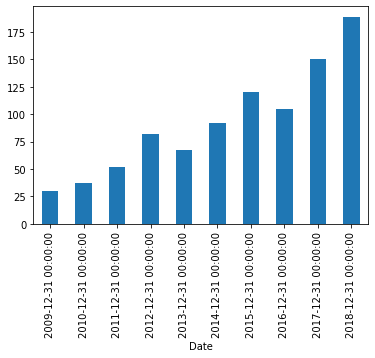

In [51]:
# 종가의 연 평균을 바 차트로 그려라.
df['Close'].resample('A').mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Date'>

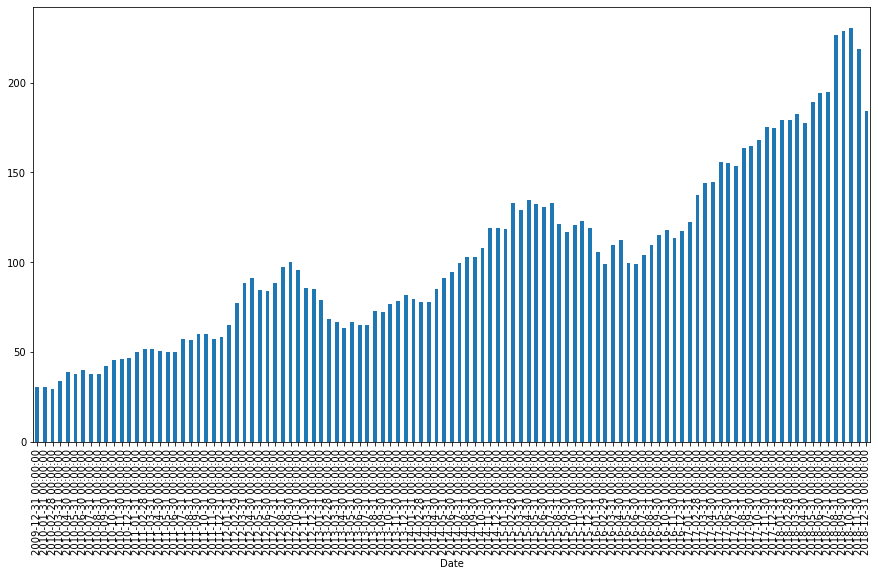

In [54]:
#시가의 월별 최댓값을 bar 차트로 그려라.
df['Open'].resample('M').max().plot(kind='bar', figsize = (15,8))

<AxesSubplot:xlabel='Date'>

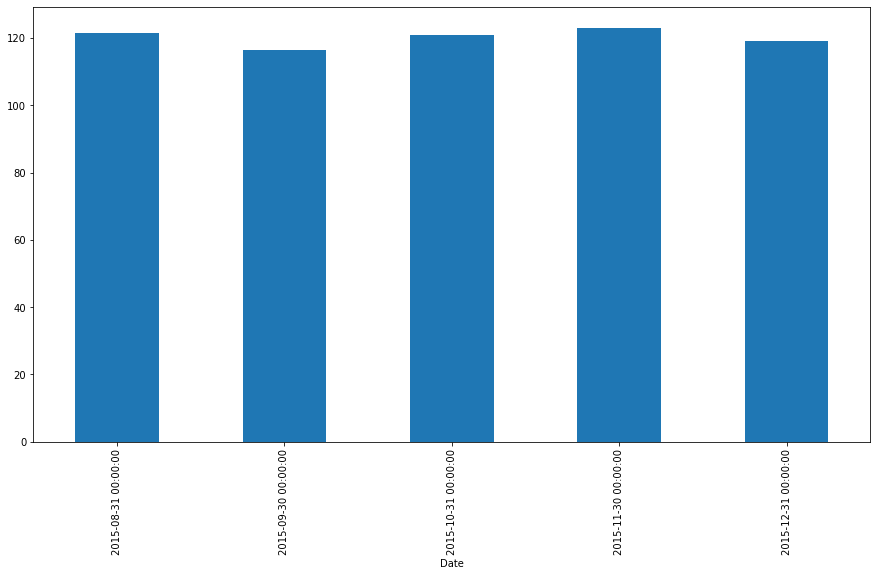

In [58]:
# 범위도 마음대로 지정가능.
df['Open']['2015/8':'2015/12'].resample('M').max().plot(kind='bar', figsize = (15,8))

In [60]:
#datetime index를 만들기위해 일일이 datetime적용해서 list만들고 index로 넣어줘야 할까? NO
daily_daterange = \
pd.date_range(start = datetime(2018,9,1), end = datetime(2019,1,24), freq = 'B') #여기엔 주말이 없어 Business Day만.

In [62]:
daily_dataset = \
pd.DataFrame(data = {'value': np.random.rand(len(daily_daterange))},
            index = daily_daterange)

In [63]:
daily_dataset

,value
2018-09-03,0.413279
2018-09-04,0.774244
2018-09-05,0.076585
2018-09-06,0.922862
2018-09-07,0.420825
...,...
2019-01-18,0.268566
2019-01-21,0.521481
2019-01-22,0.357497
2019-01-23,0.318045


In [64]:
#요일별로도 indexing할 수 있다.
daily_dataset.resample('W-MON').min()

,value
2018-09-03,0.413279
2018-09-10,0.000475
2018-09-17,0.438546
2018-09-24,0.147662
2018-10-01,0.180977
2018-10-08,0.284716
2018-10-15,0.103472
2018-10-22,0.193822
2018-10-29,0.111209
2018-11-05,0.190062


In [65]:
daily_dataset.resample('M').min()

,value
2018-09-30,0.000475
2018-10-31,0.103472
2018-11-30,0.001646
2018-12-31,0.108005
2019-01-31,0.056314


In [67]:
#바로 읽어들일 수 있음.
df = pd.read_csv('./data/apple_stock.csv', index_col = 'Date')

In [70]:
#그런데 string임. 그럼 index를 datetime으로 바꿔버리면 된다.
df.index

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

In [71]:
df.index = pd.to_datetime(df.index)

In [72]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [73]:
#하나씩 뒤로 밀렸는데, NaN값이 들어가게 됐다. 심지어 마지막데이터도 없어지게 된다. 
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [75]:
df.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


lagging했다. 

In [77]:
#이런식으로 하루씩 뒤로 미루는 것도 가능함 tshift
df.tshift(freq = 'D', periods = 1).head()

<ipython-input-77-3e5d95f2e840>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(freq = 'D', periods = 1).head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-01,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-08,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Rolling & Expanding

In [80]:
# 데이터에서 파싱할 수 있는 columns을 발견하면 datetime으로 가져오게된다.
df = pd.read_csv("./data/apple_stock.csv", index_col = 'Date', parse_dates = True) # list를 넘겨줄 수 도 있음.

In [82]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [84]:
# 그럼 파싱이 안되는 column들은 어떻게 되나 ?
# 19-01-01 이런거 파싱안된다. 19-JAN-01 파싱안됨.
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt,"%Y-%m-%d") #string parse time 스트링으로 받아서 우리가 지정한걸로 받아줌.
df = pd.read_csv('./data/apple_stock.csv', index_col = 'Date', parse_dates = ['Date'],\
                date_parser = dateparser)

<ipython-input-84-7a8aa7fdfac7>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(str_dt,"%Y-%m-%d") #string parse time 스트링으로 받아서 우리가 지정한걸로 받아줌.


In [88]:
#트랜드를 구하기위해서 사용. 앞의 6개는 7개가 안됐기때문에 NaN값이 돼버린다.
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


<AxesSubplot:xlabel='Date'>

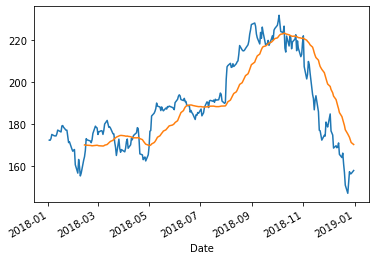

In [93]:
df['2018']['Close'].plot() #파란색
df['2018'].rolling(window = 30).mean()['Close'].plot() #주황색 트랜드가 뒷따라갈 수 밖에 없다.

<AxesSubplot:xlabel='Date'>

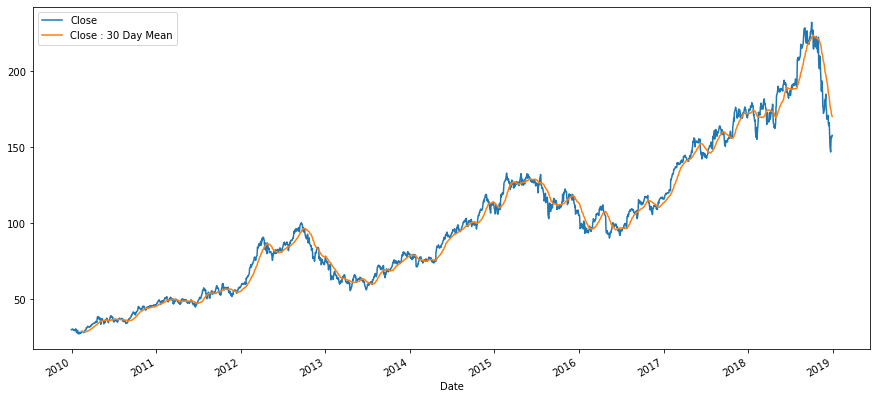

In [95]:
df['Close : 30 Day Mean'] = df['Close'].rolling(30).mean()
df[['Close','Close : 30 Day Mean']].plot(figsize=(15,7))

## Expending
rolling은 start지점이 계속 옮겨가지만, expand는 시점은 고정되어있고, 누적한다.

<AxesSubplot:xlabel='Date'>

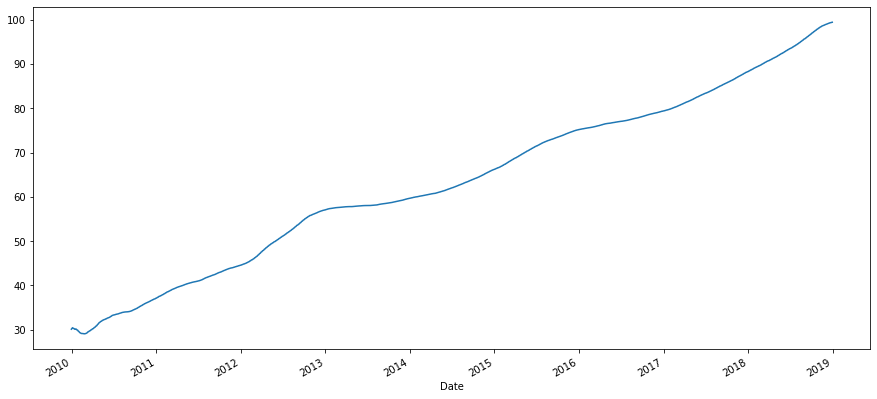

In [96]:
df['Close'].expanding(min_periods = 1).mean().plot(figsize=(15,7))

## 애플의 볼린저밴드를 그려보자.
종가의 20일치 , 위아래로 *2, -2해서 그려준다.

<AxesSubplot:xlabel='Date'>

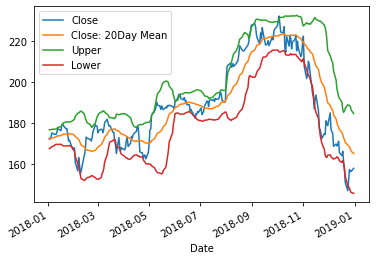

In [100]:

df['Close: 20Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 20Day Mean'] + 2*df['Close'].rolling(20).std()
df['Lower'] = df['Close: 20Day Mean'] - 2*df['Close'].rolling(20).std()
df[['Close', 'Close: 20Day Mean', 'Upper', 'Lower']]['2018'].plot()